In [1]:
# USAGE
# python test_network.py --model face_not_face.model --image images/examples/face_01.png

# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
#from PIL import Image
import seaborn as sns; sns.set()
# set the matplotlib backend so figures can be saved in the background
import matplotlib
#matplotlib.use("Agg")

# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

print("[INFO] loading network...")
model = load_model("face.model")
print("[INFO] Model Loaded")

Using TensorFlow backend.


[INFO] loading network...
[INFO] Model Loaded


In [2]:
def label_predict(img):
    ima=img
    # load the image
    image = cv2.imread(ima)
    #orig = image.copy()
    #imd = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),'RGB')
    #plt.imshow(imd)
    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # load the trained convolutional neural network
    # classify the input image
    (x, face) = model.predict(image)[0]
    # build the label
    label = "1" if face > x else "0"
    proba = face if face > x else x
    #print(label);
    #print(proba)
    return label

In [3]:
label_predict("149_data.jpg")

'1'

In [4]:
path="/home/ej/dataset/"
os.listdir(path)

['test_face', 'notface', 'face', 'data', 'test_nonface', 'test']

In [36]:
path="/home/ej/dataset/"
labels=[]
pred_labels=[]
imagePaths = os.path.join(path,"test_face")
random.seed(42)
# loop over the input images
for imagePath in os.listdir(imagePaths):
    #print(os.path.join(imagePaths,imagePath));
    pred=label_predict(os.path.join(imagePaths,imagePath))
    label = 1
    labels.append(label)
    pred_labels.append(pred)
imagePaths = os.path.join(path,"test_nonface")
random.seed(42)
# loop over the input images
for imagePath in os.listdir(imagePaths):
    #print(os.path.join(imagePaths,imagePath));
    pred=label_predict(os.path.join(imagePaths,imagePath))
    label = 0
    labels.append(label)
    pred_labels.append(pred)

In [37]:
#labels

In [38]:
pred_label=pred_labels
predicted_label=[]

In [39]:
for i in pred_label:
    predicted_label.append(int(i))

In [40]:
#predicted_label

In [41]:
 from pandas_ml import ConfusionMatrix


In [42]:
import numpy as np
y_actu=np.array(labels)
y_pred=np.array(predicted_label)
cm = ConfusionMatrix(y_actu, y_pred)

In [43]:
cm.print_stats()

population: 3141
P: 1570
N: 1571
PositiveTest: 793
NegativeTest: 2348
TP: 755
TN: 1533
FP: 38
FN: 815
TPR: 0.48089171974522293
TNR: 0.9758115849777212
PPV: 0.9520807061790668
NPV: 0.6528960817717206
FPR: 0.0241884150222788
FDR: 0.04791929382093316
FNR: 0.5191082802547771
ACC: 0.7284304361668259
F1_score: 0.6390181972069403
MCC: 0.5256376112283029
informedness: 0.4567033047229443
markedness: 0.6049767879507875
prevalence: 0.49984081502706146
LRP: 19.881076097888034
LRN: 0.5319759349512425
DOR: 37.37213432353891
FOR: 0.3471039182282794


In [44]:
import pandas as pd
y_actu_pd = pd.Series(y_actu, name='Actual')
y_pred_pd = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu_pd, y_pred_pd)

In [45]:
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [46]:
df_confusion

Predicted,0,1,All
Actual,,,
0,1533,38,1571
1,815,755,1570
All,2348,793,3141


In [47]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)

In [48]:
df_conf_norm

Predicted,0,1,All
Actual,,,
0,0.487906,0.012102,0.25008
1,0.259389,0.240446,0.24992
All,0.747295,0.252548,0.50000


In [49]:
label_predict("/home/ej/dataset/test_face/100face.jpg")

'0'

In [50]:
#help(plt.matshow)

In [51]:
def confusion_plot(data,title):
    ax = plt.axes()
    sns.heatmap(data, annot=True,ax=ax)
    ax.set_title(title)
    plt.savefig(title+".png")
    plt.show()

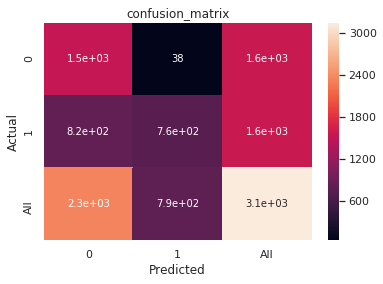

In [52]:
confusion_plot(df_confusion,"confusion_matrix")

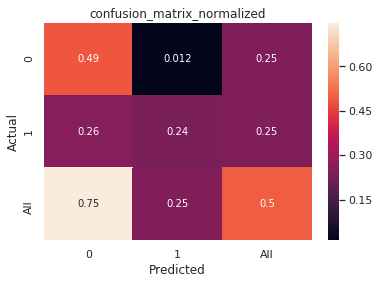

In [53]:
confusion_plot(df_conf_norm,"confusion_matrix_normalized")